In [574]:
import torch
import numpy as np
import pandas as pd
import os
import random
from IPython.display import Image
from scipy.special import softmax
np.set_printoptions(suppress=True)

In [575]:
numpy_data_path = "../../pokemonData/Training-baseline/"
image_data_path = "../../pokemonData/pokemonDataset/"

model = torch.load("./saved-models/test.pt")
model.eval()

metadata = pd.read_csv('metadata/pokemon.csv')

filtered_metadata = metadata.loc[:,['name', 'type1']]
filtered_metadata.type1 = pd.Categorical(filtered_metadata.type1)
filtered_metadata['code'] = filtered_metadata.type1.cat.codes
filtered_metadata = filtered_metadata[["type1", "code"]].drop_duplicates()

In [576]:
def extract_type(idx):
    return filtered_metadata[filtered_metadata["code"] == idx]["type1"].values[0]

In [577]:
def make_prediction(name):
    numpy_files = os.listdir(numpy_data_path+name)
    image_files = os.listdir(image_data_path+name)
    file_idx = random.choice(list(enumerate(numpy_files)))[0]
    display(Image(filename=image_data_path+name+"/"+image_files[file_idx], width = 500, height = 300))
    image_array = np.load(numpy_data_path+name+"/"+numpy_files[file_idx])[:,:,:3]
    data = image_array.astype(np.float32)
    
    data = data.transpose()
    data = data[None,:,:,:]
    data = torch.tensor(data, dtype=torch.float)
    prediction = model(data).detach().numpy()[0]

    confident_idx = np.argmax(prediction)
    print(f"Model predicted: {extract_type(confident_idx)}")
    prediction = [f"{extract_type(idx)}: {single_prediction:.2f}%" for idx, single_prediction in enumerate((softmax(prediction)*100))]
    for idx, single_prediction in enumerate(prediction):
        print(single_prediction, end='\t')
        if (idx + 1) % 6 == 0:
            print("")

Gewünschte Pokemon in der test_pokemon_list hinzufügen (in Englisch, mehrfach auflisten ist möglich)

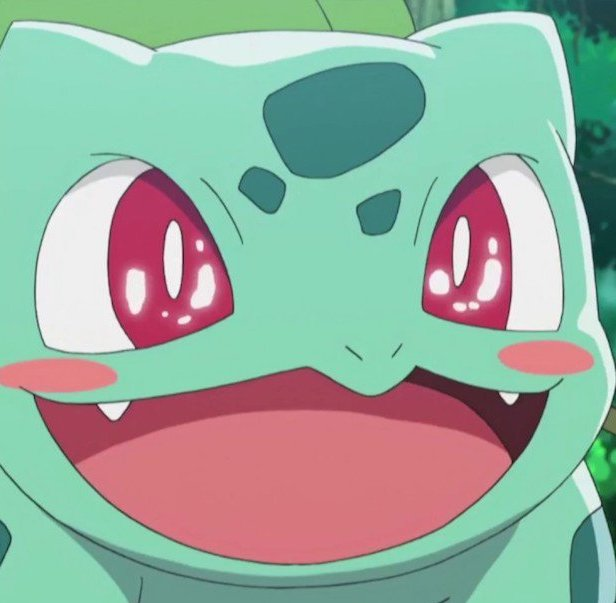

Model predicted: grass
bug: 0.05%	dark: 0.01%	dragon: 0.01%	electric: 0.05%	fairy: 0.10%	fighting: 0.01%	
fire: 0.00%	flying: 0.00%	ghost: 0.05%	grass: 64.04%	ground: 0.12%	ice: 0.03%	
normal: 32.26%	poison: 0.02%	psychic: 0.17%	rock: 0.87%	steel: 0.04%	water: 2.16%	


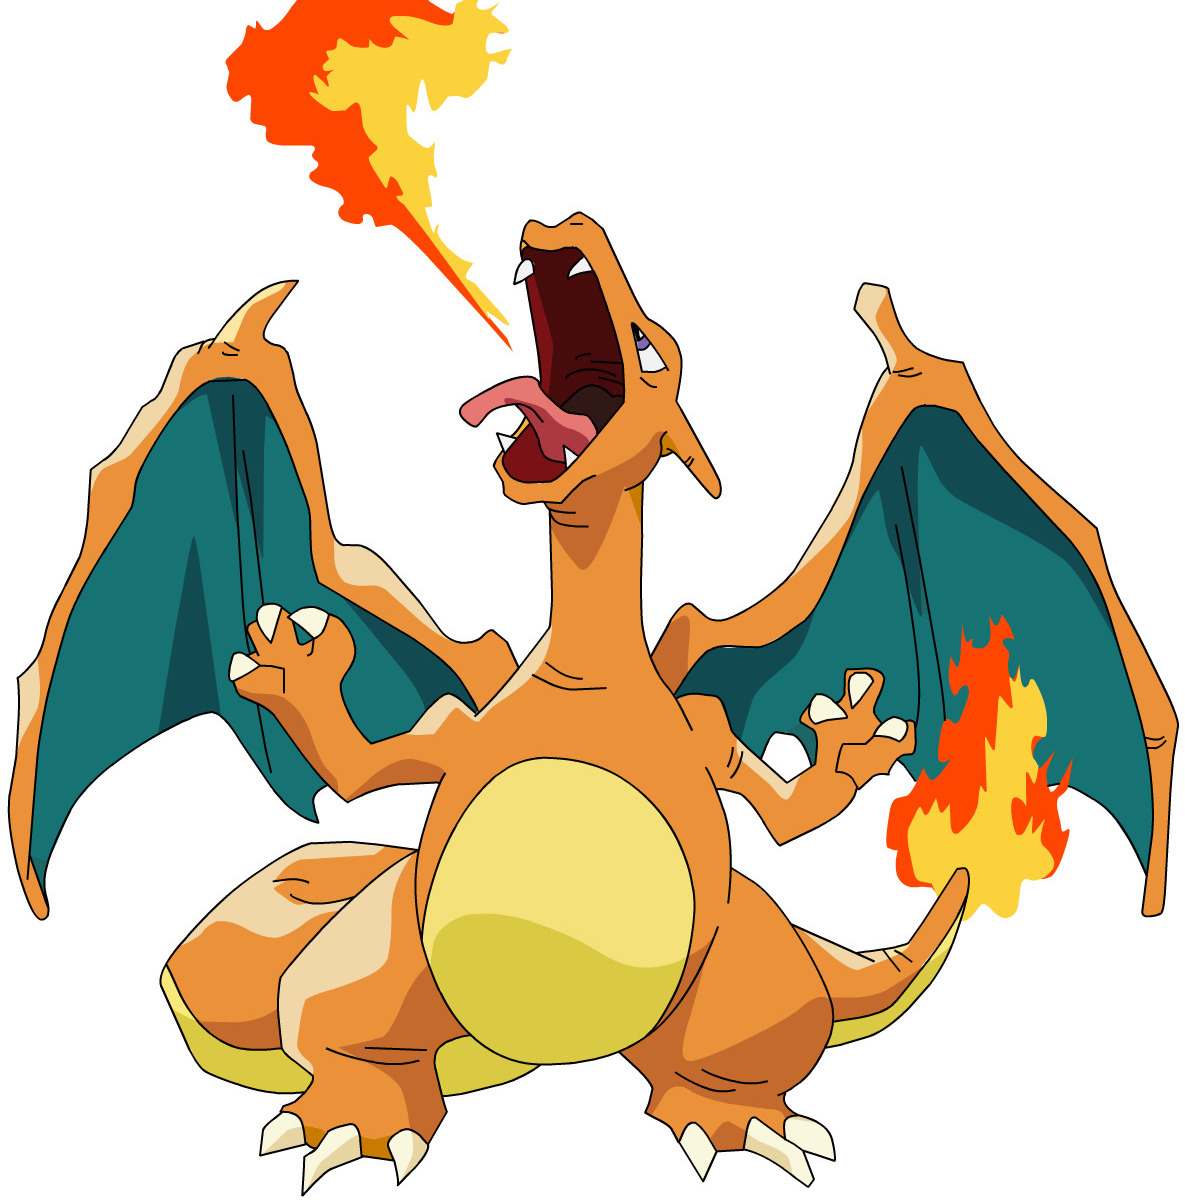

Model predicted: water
bug: 0.32%	dark: 0.17%	dragon: 0.09%	electric: 0.63%	fairy: 0.51%	fighting: 0.28%	
fire: 0.91%	flying: 0.00%	ghost: 0.10%	grass: 15.81%	ground: 0.17%	ice: 0.08%	
normal: 16.41%	poison: 0.27%	psychic: 0.36%	rock: 3.41%	steel: 0.12%	water: 60.36%	


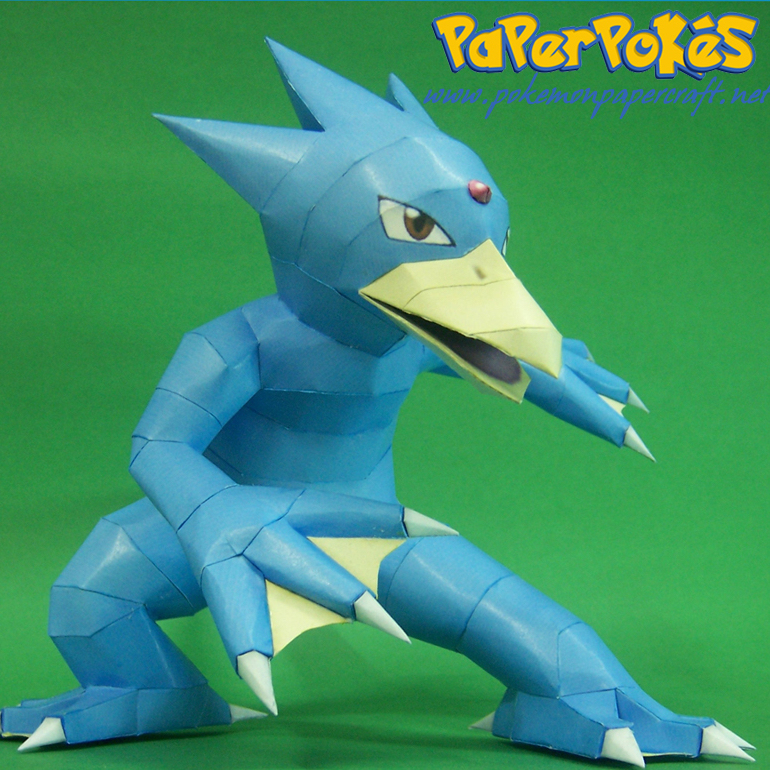

Model predicted: water
bug: 4.79%	dark: 0.40%	dragon: 11.48%	electric: 6.56%	fairy: 0.31%	fighting: 0.07%	
fire: 0.13%	flying: 0.00%	ghost: 0.17%	grass: 0.47%	ground: 0.15%	ice: 0.77%	
normal: 4.06%	poison: 9.48%	psychic: 1.04%	rock: 0.63%	steel: 0.30%	water: 59.19%	


In [585]:
test_pokemon_list = ["Bulbasaur", "Charizard", "Golduck"]
for pokemon in test_pokemon_list:
    make_prediction(pokemon)